In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
housing = fetch_california_housing()

In [3]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                             housing.target,
                                                             test_size=0.2)

In [4]:
from keras.layers import Dense
from keras.models import Sequential

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                 y_train_full)

In [6]:
X_train_full.shape[1:]

(8,)

In [7]:
model = keras.models.Sequential(
    [
        keras.layers.Dense(150,activation='relu',input_shape=X_train_full.shape[1:]),
        keras.layers.Dense(100,activation='relu'),
        keras.layers.Dense(50,activation='relu'),
        keras.layers.Dense(10,activation='relu'),
        keras.layers.Dense(1,activation='linear')
    ]
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               1350      
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 22,021
Trainable params: 22,021
Non-trainable params: 0
_________________________________________________________________


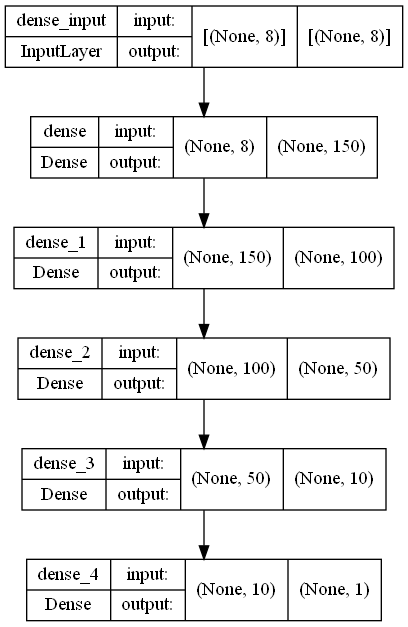

In [9]:
keras.utils.plot_model(model,show_shapes=True)

In [10]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train,
                   epochs=30,
                   batch_size=32,
                   validation_data=(X_val,y_val))

Epoch 1/30
387/387 [==============================] - 1s 835us/step - loss: nan - val_loss: nan
Epoch 2/30
387/387 [==============================] - 0s 658us/step - loss: nan - val_loss: nan
Epoch 3/30
387/387 [==============================] - 0s 642us/step - loss: nan - val_loss: nan
Epoch 4/30
387/387 [==============================] - 0s 625us/step - loss: nan - val_loss: nan
Epoch 5/30
387/387 [==============================] - 0s 618us/step - loss: nan - val_loss: nan
Epoch 6/30
387/387 [==============================] - 0s 649us/step - loss: nan - val_loss: nan
Epoch 7/30
387/387 [==============================] - 0s 642us/step - loss: nan - val_loss: nan
Epoch 8/30
387/387 [==============================] - 0s 622us/step - loss: nan - val_loss: nan
Epoch 9/30
387/387 [==============================] - 0s 682us/step - loss: nan - val_loss: nan
Epoch 10/30
387/387 [==============================] - 0s 677us/step - loss: nan - val_loss: nan
Epoch 11/30
387/387 [==================

In [11]:
X_train_full,X_test , y_train_full,y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

In [13]:
#모델 저장하기(불러와서 쓸 수 있음)
model.save("california_model.h5")
mode1= keras.models.load_model("california_model.h5")
#모델성능보기
mode.evaluate(X_test,y_test)
mode1.evaluate(X_test,y_test)

162/162 [==============================] - 0s 448us/step - loss: nan


nan

In [14]:
model.layers[0].get_weights()

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, 

In [15]:
model.save_weights("california_weights.chkp")
model.load_weights("california_weights.chkp")

In [16]:
#콜백(왜 하는거지)
model.layers[0].get_weights()[0][1]

model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             loss='mean_squared_error',
             metrics=['mse'])
chkp = keras.callbacks.ModelCheckpoint('best_result.h6',save_best_only=True)

In [17]:
??keras.callbacks.ModelCheckpoint

Init signature:
keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_loss',
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
    **kwargs,
)
Source:        
@keras_export('keras.callbacks.ModelCheckpoint')
class ModelCheckpoint(Callback):
  """Callback to save the Keras model or model weights at some frequency.

  `ModelCheckpoint` callback is used in conjunction with training using
  `model.fit()` to save a model or weights (in a checkpoint file) at some
  interval, so the model or weights can be loaded later to continue the training
  from the state saved.

  A few options this callback provides include:

  - Whether to only keep the model that has achieved the "best performance" so
    far, or whether to save the model at the end of every epoch regardless of
    performance.
  - Definition of 'best'; which quantity to monitor and whether it should be
    maximi

In [18]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_val,y_val),
                   callbacks=[chkp])

Epoch 1/30
363/363 [==============================] - 1s 916us/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 2/30
363/363 [==============================] - 0s 718us/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 3/30
363/363 [==============================] - 0s 758us/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 4/30
363/363 [==============================] - 0s 722us/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 5/30
363/363 [==============================] - 0s 717us/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 6/30
363/363 [==============================] - 0s 722us/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 7/30
363/363 [==============================] - 0s 741us/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 8/30
363/363 [==============================] - 0s 738us/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 9/30
363/363 [====

In [19]:
#불러오기
model = keras.models.load_model('best_result.h6')
#불러온걸 학습
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 494us/step - loss: 0.4589


0.4588591754436493

In [20]:
chkp = keras.callbacks.ModelCheckpoint("./log_dir/model.h5",save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
model.fit(X_train,
          y_train,
          epochs=20,
          validation_data = (X_val,y_val),
          callbacks=[chkp,early_stopping]) #오버피팅 되면 10번에서 끊어버린다

Epoch 1/20
363/363 [==============================] - 0s 804us/step - loss: 0.4418 - val_loss: 0.4861
Epoch 2/20
363/363 [==============================] - 0s 740us/step - loss: 0.4376 - val_loss: 0.4954
Epoch 3/20
363/363 [==============================] - 0s 697us/step - loss: 0.4334 - val_loss: 0.5097
Epoch 4/20
363/363 [==============================] - 0s 772us/step - loss: 0.4297 - val_loss: 0.5208
Epoch 5/20
363/363 [==============================] - 0s 696us/step - loss: 0.4260 - val_loss: 0.5405
Epoch 6/20
363/363 [==============================] - 0s 728us/step - loss: 0.4227 - val_loss: 0.5558
Epoch 7/20
363/363 [==============================] - 0s 692us/step - loss: 0.4198 - val_loss: 0.5692
Epoch 8/20
363/363 [==============================] - 0s 722us/step - loss: 0.4164 - val_loss: 0.5752
Epoch 9/20
363/363 [==============================] - 0s 745us/step - loss: 0.4137 - val_loss: 0.5893
Epoch 10/20
363/363 [==============================] - 0s 744us/step - loss: 0.410

In [21]:
!pwd

'pwd'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [22]:
??keras.callbacks.EarlyStopping

Init signature:
keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)
Source:        
@keras_export('keras.callbacks.EarlyStopping')
class EarlyStopping(Callback):
  """Stop training when a monitored metric has stopped improving.

  Assuming the goal of a training is to minimize the loss. With this, the
  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
  `model.fit()` training loop will check at end of every epoch whether
  the loss is no longer decreasing, considering the `min_delta` and
  `patience` if applicable. Once it's found no longer decreasing,
  `model.stop_training` is marked True and the training terminates.

  The quantity to be monitored needs to be available in `logs` dict.
  To make it so, pass the loss or metrics at `model.compile()`.

  Args:
    monitor: Quantity to be monitored.
    min_delta: Minimum change in the monitored q

In [23]:
#프롬프트 >> keras접속 conda keras >pip install tensorboard>해당파일 경로>mkdir log_dir>tensorboard --logdir='./log_dir --host

In [27]:
%load_ext tensorboard
# %tensorboard --logdir=./log_dir #192.168.56.101:6006 접속하면 
%tensorboard --logdir=./log_dir --host=0.0.0.0 --port=6008

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6008 (pid 18652), started 0:00:24 ago. (Use '!kill 18652' to kill it.)

In [28]:
model = keras.models.Sequential(
    [
        keras.layers.Dense(30,activation='relu',input_shape=[8]),
        keras.layers.Dense(30,activation='relu'),
        keras.layers.Dense(1)
    ]
)

model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=1e-3))
tensor_board=keras.callbacks.Tensorboard('./log_dir/model_20220522')
chkp = keras.callbacks.ModelCheckpoint("./log_dir/model.h5",save_best_only=False)
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val),callbacks=[chkp,tensor_board])

AttributeError: module 'keras.api._v2.keras.callbacks' has no attribute 'Tensorboard'

In [ ]:
#파이썬 현재 시간 구하기
from datetime import datetime

current_time = datetime.now()
str(datetime.now())[:16]

In [ ]:
def get_logdir():
    return './log_dir/'+str(datetime.now())[:16]

In [ ]:
#하이퍼 파라미터 튜닝 설명

In [ ]:
#이때까지 쓴걸로 분석하자는 말인듯
#fashion_mnist 가지고 스스로 해보기

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
np.unique(y_train).size

In [ ]:
#float형태로
X_train = X_train/255.
X_test = X_test/255.
X_val = X_val/255.

In [ ]:
#onehot형태로
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_val = keras.utils.to_categorical(y_val)

In [ ]:
y_train.shape #끝은 꼭 10이 나와야 한다

In [ ]:
model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300,activation='relu'),
        keras.layers.Dense(100,activation='relu'),
        keras.layers.Dense(10,activation='softmax')
    ]
)

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['accuracy'])

In [ ]:
from datetime import datetime

def get_logdir():
    return './log_dir/'+str(datetime.now())[:16]

In [ ]:
ckpt = keras.callbacks.ModelCheckpoint('fmnist.h5')
early_stopping = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
tensor_board=keras.callbacks.Tensorboard(get_logdir)
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_val,y_val),callbacks=[ckpt,early_stopping,tensor_board])